In [1]:
library(clusterProfiler)
library(org.At.tair.db)
library(tidyverse)
library(dplyr)
library(RColorBrewer)



clusterProfiler v4.12.2 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, doi:10.1038/s41596-024-01020-z


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmi

In [4]:
# Make simple table for analysis
Total.table <- read.csv("01.DESeq_results/total_rh_og_gene.csv")
Total.simple.table <- Total.table %>%
  dplyr::select(Gene, starts_with("log2"), starts_with("padj"))

# set the threshold
Th.lfc2 <- 1
Th.padj <- 0.05

# Filter the table
rh30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min > Th.lfc2, padj_RHAM_30min < Th.padj)
rh90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min > Th.lfc2, padj_RHAM_90min < Th.padj)
og30up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min > Th.lfc2, padj_OGs_30min < Th.padj)
og90up <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min > Th.lfc2, padj_OGs_90min < Th.padj)
rh30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_30min < -(Th.lfc2), padj_RHAM_30min < Th.padj)
rh90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_RHAM_90min < -(Th.lfc2), padj_RHAM_90min < Th.padj)
og30down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_30min < -(Th.lfc2), padj_OGs_30min < Th.padj)
og90down <- Total.simple.table %>%
  dplyr::filter(log2FoldChange_OGs_90min < -(Th.lfc2), padj_OGs_90min < Th.padj)

# rg overlap gene
rh_up <- intersect(rh30up$Gene, rh90up$Gene)
length(rh_up)

# og overlap gene
og_up <- intersect(og30up$Gene, og90up$Gene)
length(og_up)

# both overlap gene
both_up <- intersect(rh_up, og_up)
length(both_up)


[1] 488

[1] 939

[1] 303

[1] "cellular response to hypoxia"                           
  [2] "cellular response to decreased oxygen levels"           
  [3] "cellular response to oxygen levels"                     
  [4] "response to hypoxia"                                    
  [5] "response to decreased oxygen levels"                    
  [6] "response to oxygen levels"                              
  [7] "immune system process"                                  
  [8] "immune response"                                        
  [9] "defense response to bacterium"                          
 [10] "innate immune response"                                 
 [11] "defense response to symbiont"                           
 [12] "response to fungus"                                     
 [13] "response to salicylic acid"                             
 [14] "regulation of defense response"                         
 [15] "response to organic cyclic compound"                    
 [16] "response to jasmonic acid"                              
 [17] "response to fatty acid"                                 
 [18] "regulation of response to stress"                       
 [19] "indole glucosinolate metabolic process"                 
 [20] "response to wounding"                                   
 [21] "plant-type hypersensitive response"                     
 [22] "symbiont-induced defense-related programmed cell death" 
 [23] "programmed cell death"                                  
 [24] "cell death"                                             
 [25] "response to oomycetes"                                  
 [26] "positive regulation of defense response"                
 [27] "leaf senescence"                                        
 [28] "plant organ senescence"                                 
 [29] "defense response by callose deposition"                 
 [30] "regulation of response to biotic stimulus"              
 [31] "response to oxidative stress"                           
 [32] "response to water deprivation"                          
 [33] "response to water"                                      
 [34] "defense response to fungus"                             
 [35] "jasmonic acid biosynthetic process"                     
 [36] "secondary metabolic process"                            
 [37] "regulation of response to external stimulus"            
 [38] "regulation of immune system process"                    
 [39] "regulation of immune response"                          
 [40] "S-glycoside metabolic process"                          
 [41] "glycosinolate metabolic process"                        
 [42] "glucosinolate metabolic process"                        
 [43] "regulation of salicylic acid metabolic process"         
 [44] "long-chain fatty acid biosynthetic process"             
 [45] "regulation of jasmonic acid mediated signaling pathway" 
 [46] "sulfur compound metabolic process"                      
 [47] "indole glucosinolate biosynthetic process"              
 [48] "cellular response to jasmonic acid stimulus"            
 [49] "callose localization"                                   
 [50] "response to molecule of bacterial origin"               
 [51] "cellular response to fatty acid"                        
 [52] "polysaccharide localization"                            
 [53] "regulation of signal transduction"                      
 [54] "positive regulation of defense response to bacterium"   
 [55] "regulation of defense response to bacterium"            
 [56] "regulation of signaling"                                
 [57] "indole-containing compound metabolic process"           
 [58] "jasmonic acid metabolic process"                        
 [59] "regulation of cell communication"                       
 [60] "glycosyl compound metabolic process"                    
 [61] "response to reactive oxygen species"                    
 [62] "cell surface receptor signaling pathway"                
 [63] "response to ozone"         

                                   Description Count GeneRatio     p.adjust
GO:0009753           Response to jasmonic acid    15      0.07 2.110745e-07
GO:0009751          Response to salicylic acid    16      0.08 6.945862e-09
GO:0031347      Regulation of defense response    18      0.09 4.471140e-08
GO:0014070 Response to organic cyclic compound    19      0.09 1.333181e-07
GO:0045087              Innate immune response    20      0.10 3.812308e-11
GO:0006955                     Immune response    23      0.11 2.843365e-13
GO:0140546        Defense response to symbiont    23      0.11 1.542559e-10
GO:0009620                  Response to fungus    22      0.11 1.277913e-09
GO:0002376               Immune system process    26      0.13 3.160151e-16
GO:0042742       Defense response to bacterium    26      0.13 1.320012e-11


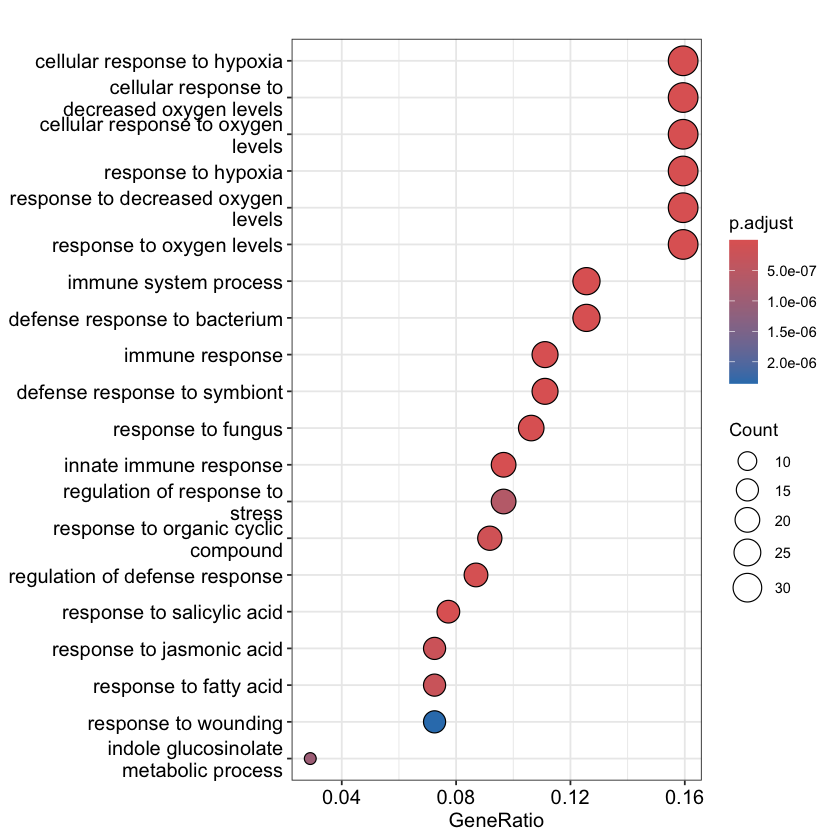

In [8]:
# Perform GO enrichment analysis
ego_both_up <- enrichGO(gene = both_up, OrgDb = org.At.tair.db, keyType = "TAIR", ont = "BP")

#dot plot
dotplot(ego_both_up, showCategory=20)

ego_both_up$Description


# Convert ego to data frame for filtering
ego_both_up_df <- as.data.frame(ego_both_up)

# Extract rows from the 7th to the 16th and select relevant columns
both_up_top <- ego_both_up_df[7:16, c("Description", "Count", "GeneRatio", "p.adjust")]

# Convert GeneRatio to numeric and format to two decimal places
both_up_top$GeneRatio <- sapply(both_up_top$GeneRatio, function(x) {
  ratio <- eval(parse(text = x))  # Evaluate the string to compute the ratio
  format(round(ratio, 2), nsmall = 2)  # Round and format to 2 decimal places
})

# Convert GeneRatio to numeric for sorting
both_up_top$GeneRatio <- as.numeric(both_up_top$GeneRatio)

# Sort both_up_top by GeneRatio in ascending order
both_up_top <- both_up_top %>%
  arrange(GeneRatio)

# Capitalize the first letter of each description
both_up_top$Description <- sapply(both_up_top$Description, function(x) {
  paste0(toupper(substring(x, 1, 1)), substring(x, 2))
})

# View the updated both_up_top
print(both_up_top)

pdf 
  2

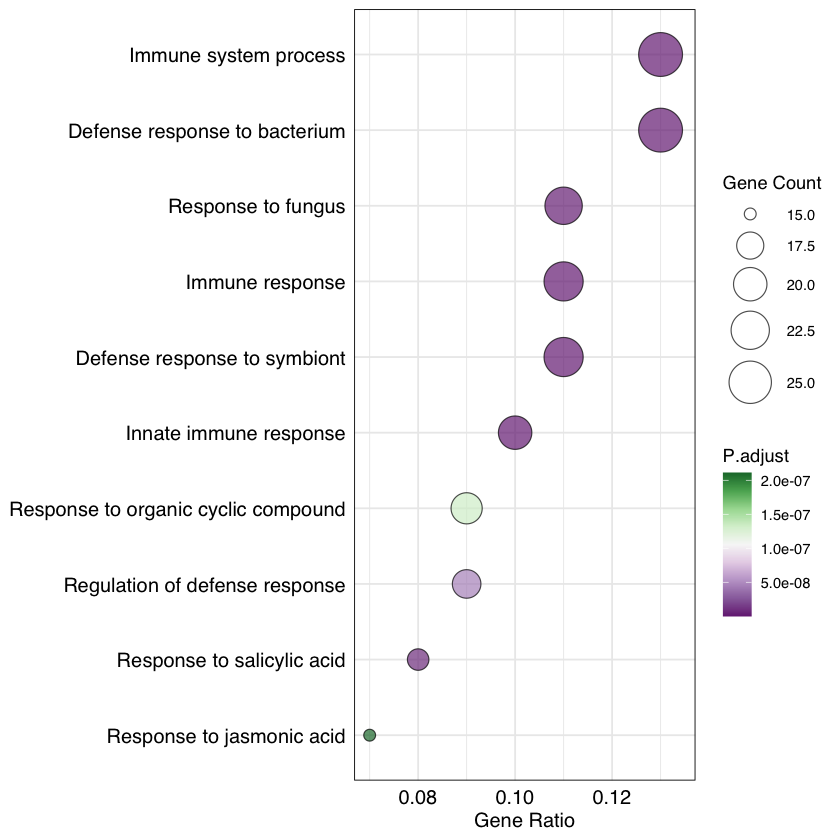

In [10]:
# Create the bubble chart with specified aesthetics
bubble <- ggplot(both_up_top, aes(x = GeneRatio, y = reorder(Description, GeneRatio))) +
  geom_point(aes(size = Count, fill = p.adjust), alpha = 0.7, 
             shape = 21, stroke = 0.5, color = "black") +  # Thinner border
  scale_size(range = c(3, 12)) +  # Adjust size range as needed
  scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "PRGn")) +  # PRGn color palette for fill
  scale_x_continuous(limits = c(0.07, 0.134)) +  # Set custom limits for the x-axis (adjust as needed)
  labs(x = "Gene Ratio",
       y = NULL,  # Remove y-axis label
       size = "Gene Count",
       fill = "P.adjust") +  # Update to use 'fill' for the legend
  theme_minimal(base_family = "Helvetica") +  # Set font to Helvetica
  theme(axis.text.y = element_text(angle = 0,color = "black", hjust = 1, size = 12),  # Customize y-axis text size
        axis.text.x = element_text(color = "black", size = 12),  # Customize x-axis text size
        axis.title.x = element_text(color = "black", size = 12),  # Customize x-axis title size
        panel.border = element_rect(color = "black", fill = NA))  # Add border around the chart
bubble

pdf(file="06.Bubble/Bubble.pdf",
    width = 6,
    height = 5)

print(bubble)
dev.off()

pdf 
  2

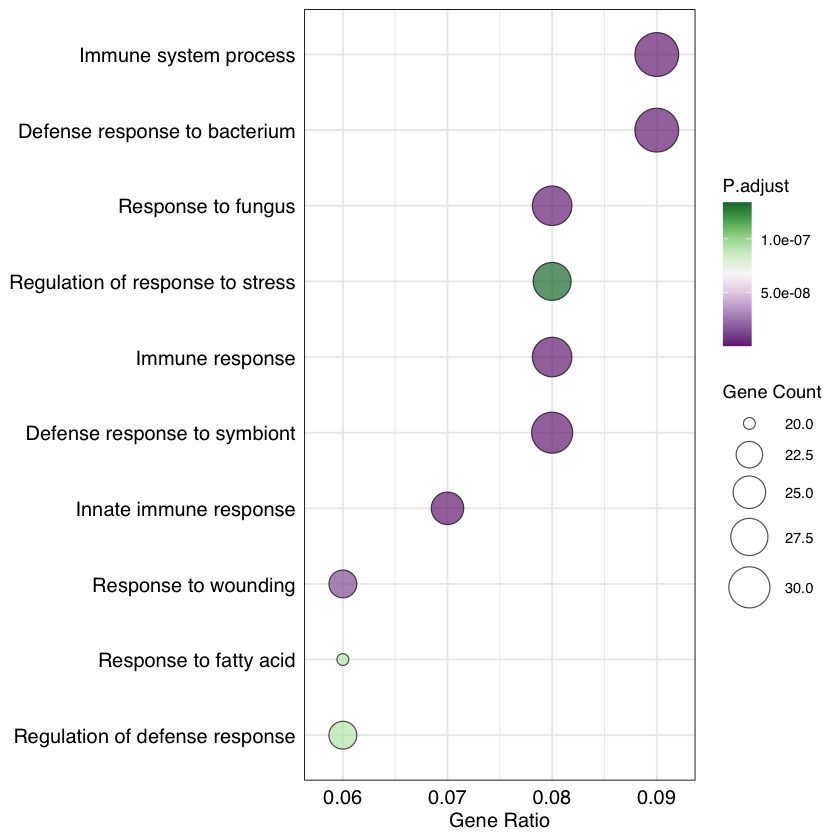

In [11]:

#### RG up overlap
# Perform GO enrichment analysis for RG overlap genes
ego_rh_up <- enrichGO(gene = rh_up, OrgDb = org.At.tair.db, keyType = "TAIR", ont = "BP")

# Convert ego to data frame for filtering
ego_rh_up_df <- as.data.frame(ego_rh_up)

# Extract rows from the 7th to the 16th and select relevant columns
rh_up_top <- ego_rh_up_df[7:16, c("Description", "Count", "GeneRatio", "p.adjust")]

# Convert GeneRatio to numeric and format to two decimal places
rh_up_top$GeneRatio <- sapply(rh_up_top$GeneRatio, function(x) {
  ratio <- eval(parse(text = x))  # Evaluate the string to compute the ratio
  format(round(ratio, 2), nsmall = 2)  # Round and format to 2 decimal places
})

# Convert GeneRatio to numeric for sorting
rh_up_top$GeneRatio <- as.numeric(rh_up_top$GeneRatio)

# Sort rh_up_top by GeneRatio in ascending order
rh_up_top <- rh_up_top %>%
  arrange(GeneRatio)

# Capitalize the first letter of each description
rh_up_top$Description <- sapply(rh_up_top$Description, function(x) {
  paste0(toupper(substring(x, 1, 1)), substring(x, 2))
})

# Create the bubble chart for RG overlap genes
bubble_rh <- ggplot(rh_up_top, aes(x = GeneRatio, y = reorder(Description, GeneRatio))) +
  geom_point(aes(size = Count, fill = p.adjust), alpha = 0.7, 
             shape = 21, stroke = 0.5, color = "black") +  # Thinner border
  scale_size(range = c(3, 12)) +  # Adjust size range as needed
  scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "PRGn")) +  # PRGn color palette for fill
  scale_x_continuous(limits = c(0.058, 0.092)) +  # Set custom limits for the x-axis (adjust as needed)
  labs(x = "Gene Ratio",
       y = NULL,  # Remove y-axis label
       size = "Gene Count",
       fill = "P.adjust") +  # Update to use 'fill' for the legend
  theme_minimal(base_family = "Helvetica") +  # Set font to Helvetica
  theme(axis.text.y = element_text(angle = 0,color = "black", hjust = 1, size = 12),  # Customize y-axis text size
        axis.text.x = element_text(color = "black", size = 12),  # Customize x-axis text size
        axis.title.x = element_text(color = "black", size = 12),  # Customize x-axis title size
        panel.border = element_rect(color = "black", fill = NA))  # Add border around the chart
bubble_rh
# Save the bubble chart to a PDF file
pdf(file="06.Bubble/Bubble_RG.pdf",
    width = 6,
    height = 5)

print(bubble_rh)
dev.off()



pdf 
  2

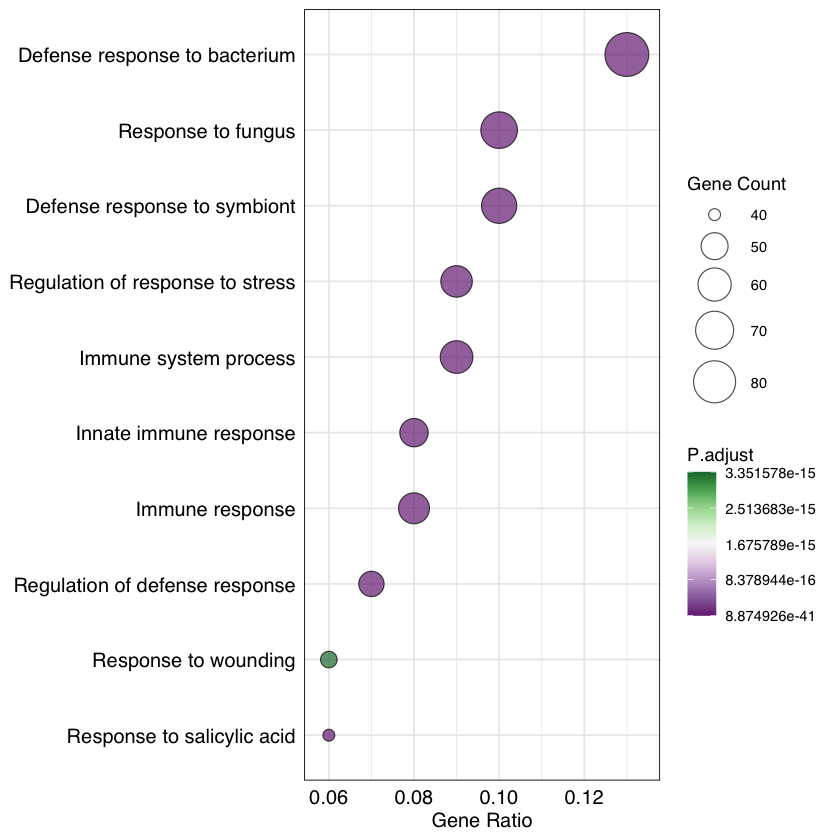

In [12]:
#### OGs up overlap
# Perform GO enrichment analysis for OG overlap genes
ego_og_up <- enrichGO(gene = og_up, OrgDb = org.At.tair.db, keyType = "TAIR", ont = "BP")

# Convert ego to data frame for filtering
ego_og_up_df <- as.data.frame(ego_og_up)

# Extract rows from the 7th to the 16th and select relevant columns
og_up_top <- ego_og_up_df[7:16, c("Description", "Count", "GeneRatio", "p.adjust")]

# Convert GeneRatio to numeric and format to two decimal places
og_up_top$GeneRatio <- sapply(og_up_top$GeneRatio, function(x) {
  ratio <- eval(parse(text = x))  # Evaluate the string to compute the ratio
  format(round(ratio, 2), nsmall = 2)  # Round and format to 2 decimal places
})

# Convert GeneRatio to numeric for sorting
og_up_top$GeneRatio <- as.numeric(og_up_top$GeneRatio)

# Sort og_up_top by GeneRatio in ascending order
og_up_top <- og_up_top %>%
  arrange(GeneRatio)

# Capitalize the first letter of each description
og_up_top$Description <- sapply(og_up_top$Description, function(x) {
  paste0(toupper(substring(x, 1, 1)), substring(x, 2))
})

# Create the bubble chart for OG overlap genes
bubble_og <- ggplot(og_up_top, aes(x = GeneRatio, y = reorder(Description, GeneRatio))) +
  geom_point(aes(size = Count, fill = p.adjust), alpha = 0.7, 
             shape = 21, stroke = 0.5, color = "black") +  # Thinner border
  scale_size(range = c(3, 12)) +  # Adjust size range as needed
  scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "PRGn")) +  # PRGn color palette for fill
  scale_x_continuous(limits = c(0.058, 0.134)) +  # Set custom limits for the x-axis (adjust as needed)
  labs(x = "Gene Ratio",
       y = NULL,  # Remove y-axis label
       size = "Gene Count",
       fill = "P.adjust") +  # Update to use 'fill' for the legend
  theme_minimal(base_family = "Helvetica") +  # Set font to Helvetica
  theme(axis.text.y = element_text(angle = 0, color = "black", hjust = 1, size = 12),  # Customize y-axis text size
        axis.text.x = element_text(color = "black", size = 12),  # Customize x-axis text size
        axis.title.x = element_text(color = "black", size = 12),  # Customize x-axis title size
        panel.border = element_rect(color = "black", fill = NA))  # Add border around the chart
bubble_og

# Save the bubble chart to a PDF file
pdf(file="06.Bubble/Bubble_OG.pdf",
    width = 6,
    height = 5)

print(bubble_og)
dev.off()